In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Participant

In [2]:
participant_df = pd.read_csv('raw_data/participant.csv')
participant_df.set_index('id', inplace=True)
print(participant_df.shape)
participant_df.head(15)

(1742840, 133)


,matchId,teamId,turn,summonerId,gameEndedInEarlySurrender,gameEndedInSurrender,teamPosition,individualPosition,lane,role,...,commandPings,dangerPings,enemyMissingPings,enemyVisionPings,getBackPings,holdPings,needVisionPings,onMyWayPings,pushPings,visionClearedPings
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,xXAY6gHwrEFXM7PDeI12F15C6DCnO8hdUEFWcVf-rCytjGc,False,False,TOP,TOP,JUNGLE,NONE,...,9.0,0.0,8.0,1.0,4.0,0.0,0.0,7.0,0.0,0.0
1,0,0,2,-Bht-jMTZb3EMTWFbCNYVUEfUbZwle-uUWpv5qTjfua2-y...,False,False,JUNGLE,JUNGLE,JUNGLE,NONE,...,8.0,0.0,8.0,0.0,6.0,0.0,0.0,33.0,0.0,0.0
2,0,0,3,isjfqtAaybcjxhZ-DLM1GOaFAHxtFuuxidNduqUBKEs-IUiV,False,False,MIDDLE,MIDDLE,MIDDLE,SOLO,...,5.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0,0,4,NG2G6d7TTRKHDxiOBxZpuNSd8Mq6cnDUe61OtB8ut7RPII8,False,False,BOTTOM,BOTTOM,BOTTOM,CARRY,...,11.0,0.0,4.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0
4,0,0,5,xf0w2S7ZrZoWO50YkLubadv5V5e-pkmbIQP6rSvQIigIzB4,False,False,UTILITY,UTILITY,BOTTOM,SUPPORT,...,6.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
5,0,1,6,uEE3xuUIDtQThTI1MljAfXOqeQgdsIcJK0vmk9XjDJeeIO5B,False,False,TOP,TOP,TOP,SOLO,...,17.0,0.0,32.0,4.0,5.0,0.0,0.0,6.0,0.0,0.0
6,0,1,7,hgh6ERyRsEMBukyRVo6YS0m7P6Ch9FISBqxmz_5_PFK3BsVu,False,False,JUNGLE,JUNGLE,JUNGLE,NONE,...,16.0,0.0,1.0,0.0,14.0,0.0,0.0,65.0,0.0,0.0
7,0,1,8,uCVidxZ_WNGbFOoD-lUZyW_UKZZafgohluHP3dNEEV37Vno,False,False,MIDDLE,MIDDLE,MIDDLE,SOLO,...,4.0,0.0,6.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
8,0,1,9,anM8eSF5mMN1X931ZKWhYV5lHYF0aVV2MXTZ_2EnJ2N8k-ZW,False,False,BOTTOM,BOTTOM,JUNGLE,NONE,...,18.0,0.0,2.0,1.0,2.0,5.0,0.0,21.0,2.0,0.0


In [3]:
match_df = pd.read_csv('clean_data/match.csv')
match_df.set_index('id', inplace=True)
print(match_df.shape)
match_df.head()

(174100, 5)


,gameVersion,gameDurationCluster,afkEarlySurrender,tierId,divisionId
id,,,,,
0,13.19,1,False,4,4
1,13.19,2,False,4,4
2,13.13,1,False,4,4
3,13.13,2,False,4,4
4,13.19,1,False,4,4


Usaremos únicamente los relacionados a las partidas ya preparadas

In [4]:
participant_df = participant_df[participant_df['matchId'].isin(match_df.index.tolist())]
participant_df.shape

(1741000, 133)

Primero eliminamos variables de identificación innecesarias

In [5]:
participant_df.drop('summonerId', axis=1, inplace=True)

### Datos faltantes

In [6]:
na_counts = participant_df.isna().sum()
na_counts_nonzero = na_counts[na_counts > 0]
print(na_counts_nonzero)

teamPosition                       784
totalAllyJungleMinionsKilled     29310
totalEnemyJungleMinionsKilled    29310
allInPings                        7810
assistMePings                     7810
baitPings                         7810
basicPings                        3250
commandPings                      7810
dangerPings                       7810
enemyMissingPings                 7810
enemyVisionPings                  7810
getBackPings                      7810
holdPings                         7810
needVisionPings                   7810
onMyWayPings                      7810
pushPings                         7810
visionClearedPings                7810
dtype: int64


Parece que la implementación de los sistemas de alertas no es constante; además, no se considera importante para la predicción, por lo cual se ignorarán.

In [7]:
participant_df.drop(
    inplace=True,
    axis=1,
    columns=[
        'allInPings',
        'assistMePings',
        'baitPings',
        'basicPings',
        'commandPings',
        'dangerPings',
        'enemyMissingPings',
        'enemyVisionPings',
        'getBackPings',
        'holdPings',
        'needVisionPings',
        'onMyWayPings',
        'pushPings',
        'visionClearedPings'
    ])

In [8]:
na_counts = participant_df.isna().sum()
na_counts_nonzero = na_counts[na_counts > 0]
print(na_counts_nonzero)

teamPosition                       784
totalAllyJungleMinionsKilled     29310
totalEnemyJungleMinionsKilled    29310
dtype: int64


Los parámetros totalAllyJungleMinionsKilled y totalEnemyJungleMinionsKilled fueron agregados el 2023/04/19, por lo cual no están presentes en la data de partidas previas a la fecha; sin embargo, seria importante tenerlo para proximas versiones para evaluar el estilo de juego de algunos campeones.

In [9]:
participant_df.drop(
    inplace=True,
    axis=1,
    columns=[
        'totalAllyJungleMinionsKilled',
        'totalEnemyJungleMinionsKilled'
    ]
)

Revisaremos que las variables tengan una varianza diferente de 0

In [10]:
for column in participant_df.columns:
    if participant_df[column].nunique() < 2:
        print(column)

sightWardsBoughtInGame


Entonces se decidió eliminar la variable sightWardsBoughtInGame ya que no aportaba a la predicción

In [11]:
participant_df.drop(
    inplace=True,
    axis=1,
    columns=[
        'sightWardsBoughtInGame'
    ]
)

Ahora tendríamos que investigar un poco más en la información de teamPosition ya que al parecer hubieron problemas durante un época para estos valores; sin embargo, se recomienda usarlo a pesar que podria ser reemplazado por individual position, por cual aplicaremos una sustitución donde si exista.

In [12]:
participant_df['teamPosition'].unique()

array(['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'UTILITY', nan], dtype=object)

Aparentemente se debe a un problema generado

In [13]:
participant_df.head()

,matchId,teamId,turn,gameEndedInEarlySurrender,gameEndedInSurrender,teamPosition,individualPosition,lane,role,championId,...,nexusTakedowns,turretKills,turretTakedowns,inhibitorKills,inhibitorTakedowns,visionScore,visionWardsBoughtInGame,detectorWardsPlaced,wardsKilled,wardsPlaced
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,False,False,TOP,TOP,JUNGLE,NONE,23,...,0,2,3,1,1,10,0,0,0,7
1,0,0,2,False,False,JUNGLE,JUNGLE,JUNGLE,NONE,203,...,0,1,2,0,0,13,0,0,4,1
2,0,0,3,False,False,MIDDLE,MIDDLE,MIDDLE,SOLO,90,...,0,3,3,0,0,16,0,0,1,8
3,0,0,4,False,False,BOTTOM,BOTTOM,BOTTOM,CARRY,145,...,0,0,2,0,0,15,0,0,3,7
4,0,0,5,False,False,UTILITY,UTILITY,BOTTOM,SUPPORT,12,...,0,0,0,0,0,45,9,6,3,22


### Evaluación general

In [14]:
numeric_and_bool_cols = participant_df.select_dtypes(include=[np.number]).columns
participant_corr = participant_df[numeric_and_bool_cols].corr()

In [15]:
participant_corr

,matchId,teamId,turn,championId,champExperience,champLevel,championBan,kills,doubleKills,tripleKills,...,nexusTakedowns,turretKills,turretTakedowns,inhibitorKills,inhibitorTakedowns,visionScore,visionWardsBoughtInGame,detectorWardsPlaced,wardsKilled,wardsPlaced
matchId,1.000000e+00,1.000000,-1.958009e-14,-0.007120,0.019978,0.016910,0.004713,0.011699,0.005170,0.002006,...,-0.001408,0.003426,-0.000537,0.005687,0.003697,-0.000124,-0.009035,-0.009318,-0.013194,-0.000476
teamId,1.000000e+00,1.000000,4.326010e-06,-0.007120,0.019978,0.016909,0.004713,0.011699,0.005170,0.002006,...,-0.001408,0.003426,-0.000537,0.005687,0.003697,-0.000124,-0.009035,-0.009318,-0.013194,-0.000476
turn,-1.958009e-14,0.000004,1.000000e+00,0.031617,-0.139532,-0.126894,-0.000730,-0.088563,-0.027807,-0.010646,...,-0.003898,-0.109184,-0.031062,-0.038992,-0.005295,0.242221,0.147537,0.148695,0.165129,0.266774
championId,-7.120307e-03,-0.007120,3.161700e-02,1.000000,-0.031031,-0.028425,-0.010430,-0.036478,-0.006555,0.006653,...,0.001090,-0.022175,-0.001811,-0.013011,-0.002039,0.076540,0.059846,0.056112,0.054655,0.101511
champExperience,1.997767e-02,0.019978,-1.395318e-01,-0.031031,1.000000,0.945926,0.001323,0.581128,0.330228,0.171850,...,0.264851,0.423095,0.413626,0.284906,0.339410,0.141726,-0.005399,0.006941,0.136056,0.080843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionScore,-1.241783e-04,-0.000124,2.422211e-01,0.076540,0.141726,0.172513,-0.000460,-0.104430,-0.093932,-0.050850,...,0.104599,-0.129184,0.084424,-0.008610,0.136580,1.000000,0.627605,0.651271,0.724074,0.902034
visionWardsBoughtInGame,-9.035048e-03,-0.009035,1.475366e-01,0.059846,-0.005399,0.025826,0.003302,-0.130011,-0.099905,-0.054574,...,0.051759,-0.146405,0.002682,-0.042717,0.055930,0.627605,1.000000,0.953243,0.424772,0.571905
detectorWardsPlaced,-9.318247e-03,-0.009318,1.486953e-01,0.056112,0.006941,0.037308,0.003140,-0.130963,-0.104255,-0.057986,...,0.059149,-0.141301,0.011654,-0.039739,0.063165,0.651271,0.953243,1.000000,0.436274,0.604667
wardsKilled,-1.319358e-02,-0.013194,1.651286e-01,0.054655,0.136056,0.154632,-0.001853,0.008624,-0.001954,-0.002898,...,0.079967,-0.082576,0.054406,0.008314,0.099790,0.724074,0.424772,0.436274,1.000000,0.530083


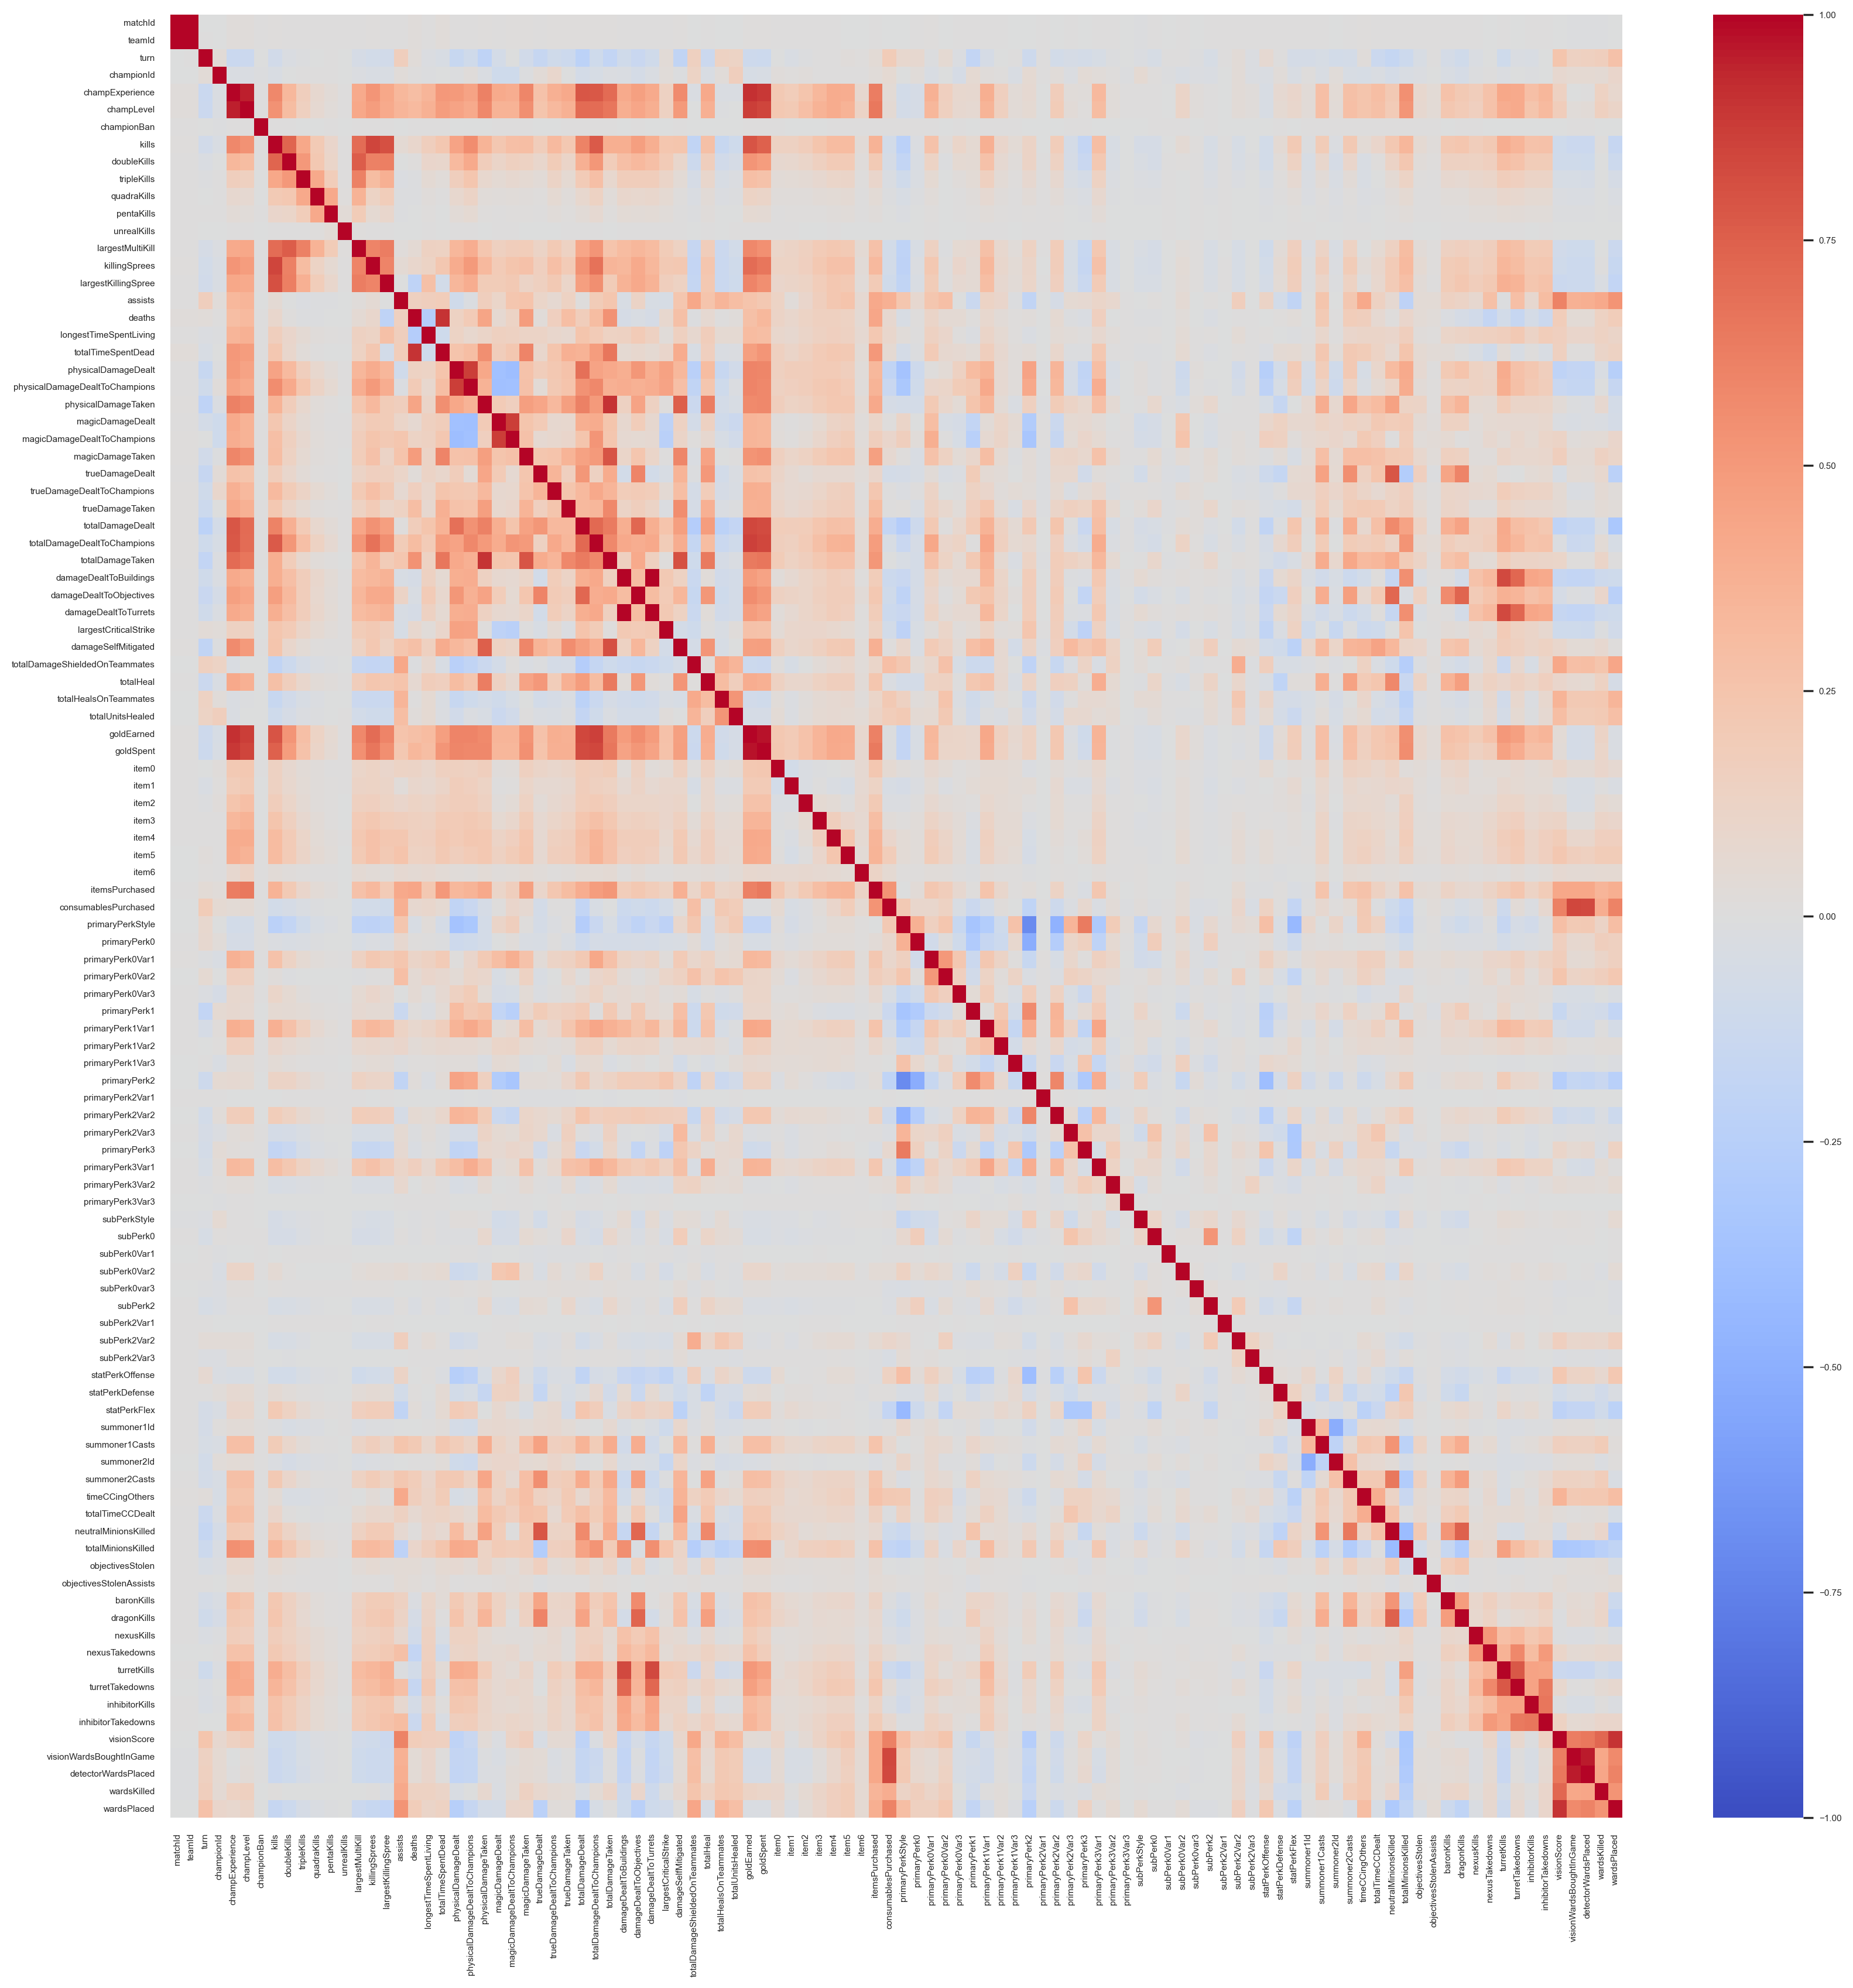

In [16]:
if not np.all(np.isfinite(participant_corr)):
    print("La matriz de correlación contiene valores no finitos.")
else:
    sns.set(font_scale=0.5)
    plt.figure(figsize=(20, 20), dpi=200)
    sns.heatmap(participant_corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)


Como un dato se esperaba que se agruparan correlaciones altas alrededor de la diagonal debido a como se ordenaron las columnas por grupos.
Primero se puede observar que:
* Las variable goldEarned y goldSpent tienen una alta correlación con casi todas las variables e incluso entre si asi que se eliminará la variable goldSpent
* Existe un correlación lógica entre el daño producido y la información de los objetivos

### Objetivos por participante

In [17]:
part_obj_df = participant_df[
    [
        'objectivesStolen',
        'objectivesStolenAssists',
        'baronKills',
        'dragonKills',
        'firstBloodKill',
        'firstBloodAssist',
        'firstTowerKill',
        'firstTowerAssist',
        'nexusKills',
        'nexusTakedowns',
        'turretKills',
        'turretTakedowns',
        'inhibitorKills',
        'inhibitorTakedowns'
    ]
]

In [18]:
part_obj_corr = part_obj_df.corr()

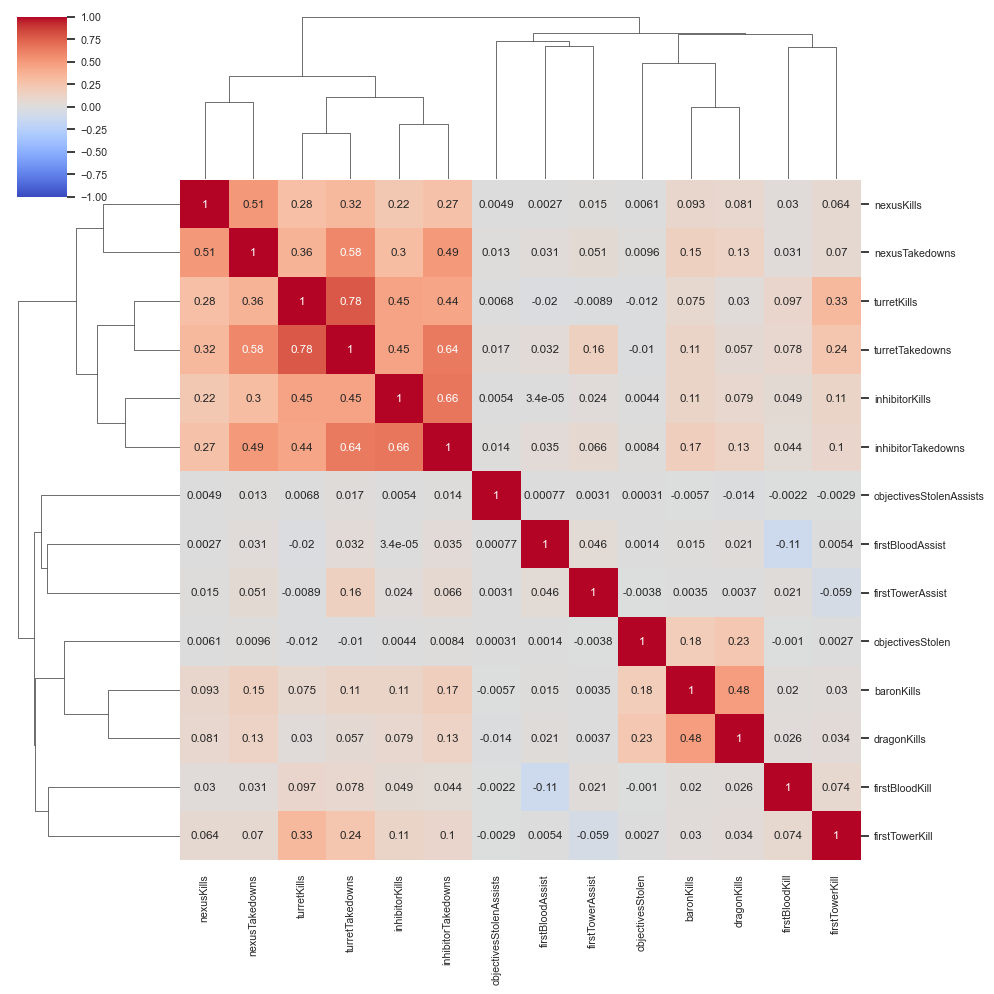

In [19]:
sns.set(font_scale=0.7)
sns.clustermap(part_obj_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [20]:
participant_df.drop('turretKills', axis=1, inplace=True)

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(part_obj_df)  # Clustering en 3 grupos

C:\Users\Cesar\DataspellProjects\AI-TF\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='inhibitorTakedowns', ylabel='turretTakedowns'>

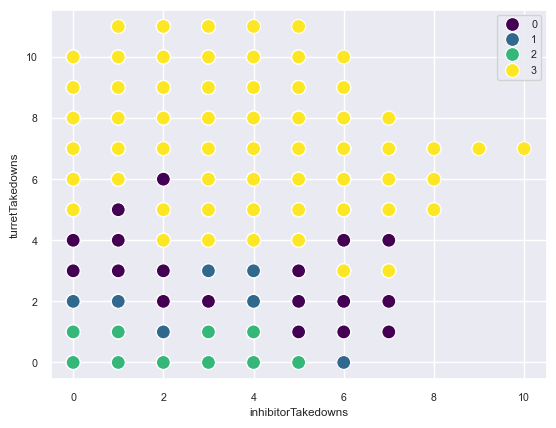

In [22]:
sns.scatterplot(x=participant_df['inhibitorTakedowns'], y=participant_df['turretTakedowns'], hue=kmeans.labels_, palette='viridis', s=100, legend='full')

In [23]:
participant_df.drop(
    inplace=True,
    axis=1,
    columns=[
        'objectivesStolen',
        'objectivesStolenAssists',
        'baronKills',
        'dragonKills',
        'firstBloodKill',
        'firstBloodAssist',
        'firstTowerKill',
        'firstTowerAssist',
        'nexusKills',
        'nexusTakedowns',
        'turretTakedowns',
        'inhibitorKills',
        'inhibitorTakedowns'
    ]
)
participant_df['objectivePlaystyle'] = kmeans.labels_

La única correlación importante 0.78 para los objetivos del jugador está en turretKills y turretTakeDowns, es decir torres derribadas y asistidas. Considerando la correlación que existe con las demás variables, se dispone de  turretKills.

### Curaciones

In [24]:
part_heal_df = participant_df[
    [
        'totalHeal',
        'totalHealsOnTeammates',
        'totalUnitsHealed'
    ]
]

<Figure size 800x800 with 0 Axes>

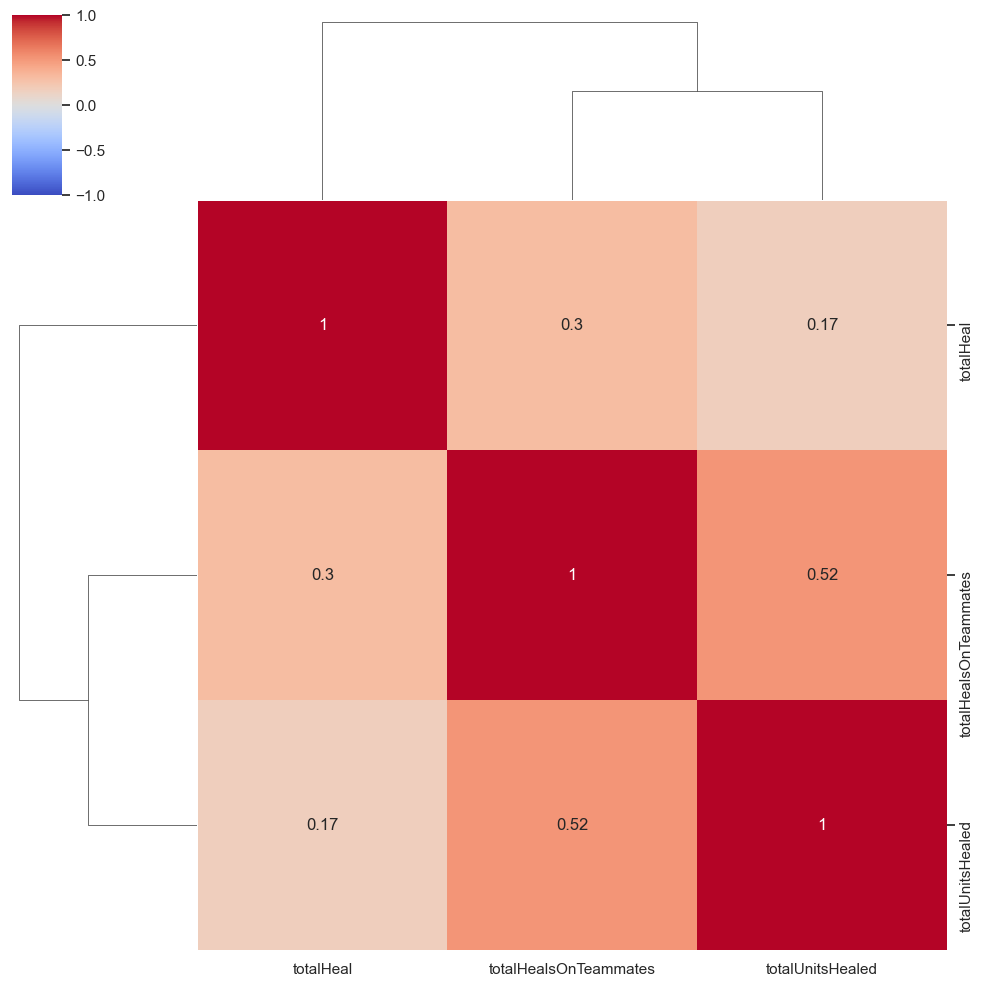

In [25]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 8))
sns.clustermap(part_heal_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

No hay alguna correlación importante

In [26]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(part_heal_df)

C:\Users\Cesar\DataspellProjects\AI-TF\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='totalHealsOnTeammates', ylabel='totalHeal'>

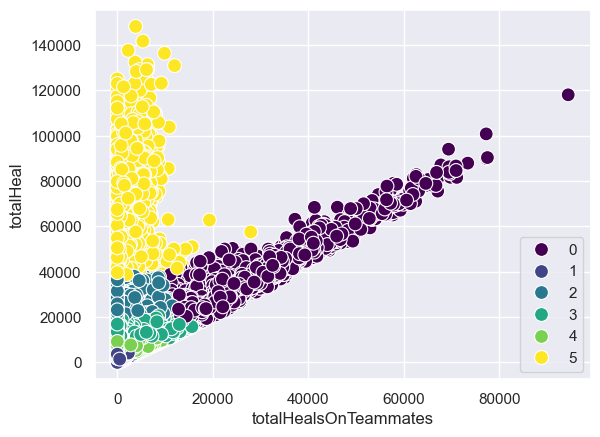

In [27]:
sns.scatterplot(x=participant_df['totalHealsOnTeammates'], y=participant_df['totalHeal'], hue=kmeans.labels_, palette='viridis', s=100, legend='full')

In [28]:
participant_df.drop(
    inplace=True,
    axis=1,
    columns=[
        'totalHeal',
        'totalHealsOnTeammates',
        'totalUnitsHealed'
    ]
)
participant_df['healPlaystyle'] = kmeans.labels_

In [29]:
participant_df

,matchId,teamId,turn,gameEndedInEarlySurrender,gameEndedInSurrender,teamPosition,individualPosition,lane,role,championId,...,totalTimeCCDealt,neutralMinionsKilled,totalMinionsKilled,visionScore,visionWardsBoughtInGame,detectorWardsPlaced,wardsKilled,wardsPlaced,objectivePlaystyle,healPlaystyle
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,False,False,TOP,TOP,JUNGLE,NONE,23,...,112,4,203,10,0,0,0,7,0,4
1,0,0,2,False,False,JUNGLE,JUNGLE,JUNGLE,NONE,203,...,143,145,30,13,0,0,4,1,0,3
2,0,0,3,False,False,MIDDLE,MIDDLE,MIDDLE,SOLO,90,...,383,4,221,16,0,0,1,8,0,1
3,0,0,4,False,False,BOTTOM,BOTTOM,BOTTOM,CARRY,145,...,0,8,151,15,0,0,3,7,2,1
4,0,0,5,False,False,UTILITY,UTILITY,BOTTOM,SUPPORT,12,...,204,0,33,45,9,6,3,22,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742835,174284,348567,6,False,False,TOP,TOP,JUNGLE,NONE,36,...,220,4,171,17,0,0,1,8,0,4
1742836,174284,348567,7,False,False,JUNGLE,JUNGLE,JUNGLE,NONE,121,...,375,159,18,37,7,6,6,6,1,3
1742837,174284,348567,8,False,False,MIDDLE,MIDDLE,MIDDLE,SOLO,238,...,263,16,179,10,1,1,1,3,0,1


### Rol en partida

In [30]:
participant_df.head(10)

,matchId,teamId,turn,gameEndedInEarlySurrender,gameEndedInSurrender,teamPosition,individualPosition,lane,role,championId,...,totalTimeCCDealt,neutralMinionsKilled,totalMinionsKilled,visionScore,visionWardsBoughtInGame,detectorWardsPlaced,wardsKilled,wardsPlaced,objectivePlaystyle,healPlaystyle
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,False,False,TOP,TOP,JUNGLE,NONE,23,...,112,4,203,10,0,0,0,7,0,4
1,0,0,2,False,False,JUNGLE,JUNGLE,JUNGLE,NONE,203,...,143,145,30,13,0,0,4,1,0,3
2,0,0,3,False,False,MIDDLE,MIDDLE,MIDDLE,SOLO,90,...,383,4,221,16,0,0,1,8,0,1
3,0,0,4,False,False,BOTTOM,BOTTOM,BOTTOM,CARRY,145,...,0,8,151,15,0,0,3,7,2,1
4,0,0,5,False,False,UTILITY,UTILITY,BOTTOM,SUPPORT,12,...,204,0,33,45,9,6,3,22,2,4
5,0,1,6,False,False,TOP,TOP,TOP,SOLO,122,...,60,1,124,23,1,1,3,8,2,1
6,0,1,7,False,False,JUNGLE,JUNGLE,JUNGLE,NONE,104,...,287,151,41,28,3,3,2,5,1,4
7,0,1,8,False,False,MIDDLE,MIDDLE,MIDDLE,SOLO,34,...,931,0,178,16,0,0,2,8,0,1
8,0,1,9,False,False,BOTTOM,BOTTOM,JUNGLE,NONE,29,...,320,16,209,15,1,1,1,8,3,4


In [31]:
mask = participant_df['teamPosition'].notna()
participant_df.loc[mask, 'individualPosition'] = participant_df.loc[mask, 'teamPosition']
participant_df['Position'] = participant_df['individualPosition']
participant_df.drop('teamPosition', axis=1, inplace=True)
participant_df.drop('individualPosition', axis=1, inplace=True)
participant_df.head(10)

,matchId,teamId,turn,gameEndedInEarlySurrender,gameEndedInSurrender,lane,role,championId,championName,champExperience,...,neutralMinionsKilled,totalMinionsKilled,visionScore,visionWardsBoughtInGame,detectorWardsPlaced,wardsKilled,wardsPlaced,objectivePlaystyle,healPlaystyle,Position
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,False,False,JUNGLE,NONE,23,Tryndamere,13182,...,4,203,10,0,0,0,7,0,4,TOP
1,0,0,2,False,False,JUNGLE,NONE,203,Kindred,12374,...,145,30,13,0,0,4,1,0,3,JUNGLE
2,0,0,3,False,False,MIDDLE,SOLO,90,Malzahar,13929,...,4,221,16,0,0,1,8,0,1,MIDDLE
3,0,0,4,False,False,BOTTOM,CARRY,145,Kaisa,9258,...,8,151,15,0,0,3,7,2,1,BOTTOM
4,0,0,5,False,False,BOTTOM,SUPPORT,12,Alistar,8200,...,0,33,45,9,6,3,22,2,4,UTILITY
5,0,1,6,False,False,TOP,SOLO,122,Darius,9541,...,1,124,23,1,1,3,8,2,1,TOP
6,0,1,7,False,False,JUNGLE,NONE,104,Graves,13937,...,151,41,28,3,3,2,5,1,4,JUNGLE
7,0,1,8,False,False,MIDDLE,SOLO,34,Anivia,12944,...,0,178,16,0,0,2,8,0,1,MIDDLE
8,0,1,9,False,False,JUNGLE,NONE,29,Twitch,12398,...,16,209,15,1,1,1,8,3,4,BOTTOM


### Campeon

In [32]:
part_champ_df = participant_df[[
    'championId',
    #'championName',
    'champExperience',
    'champLevel',
    'championBan']]

<Figure size 800x800 with 0 Axes>

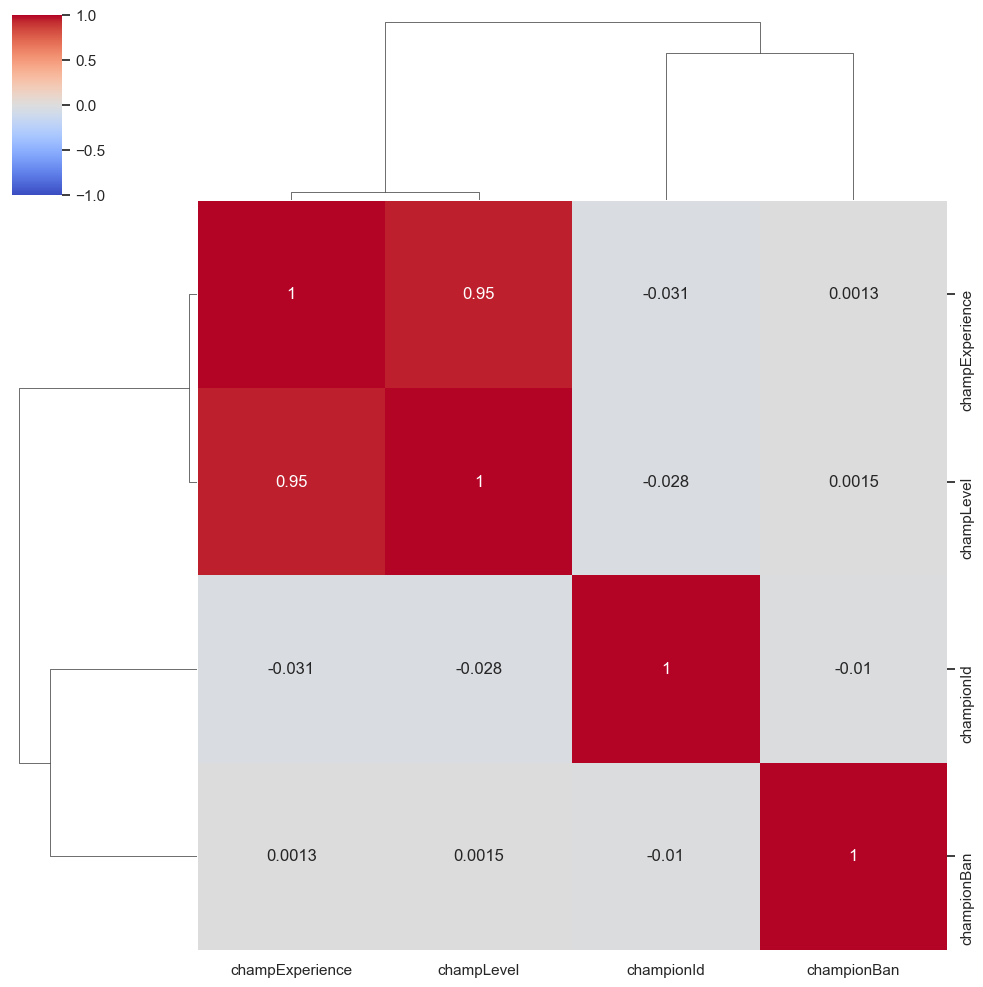

In [33]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 8))
sns.clustermap(part_champ_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

Hay una alta correlación entre el nivel y la experiencia, teniendo en cuenta que el nivel de un campeón es una variable discreta con un rango de valores menor, entonces optaremos por mantener 'champLevel' y eliminaremos 'champExperience'

In [34]:
#sns.scatterplot(data=participant_df, x='championName', y='championId')
participant_df.groupby('championId')['championName'].nunique() == 1

championId
1      True
2      True
3      True
4      True
5      True
       ... 
888    True
895    True
897    True
902    True
950    True
Name: championName, Length: 165, dtype: bool

Revisamos que los id están asignados correctamente asi que podemos eliminar los nombres de los campeones y asociarlos por su id.

In [35]:
participant_df[['championId', 'championName']].to_csv('clean_data/champion.csv', index=False)
participant_df = participant_df.drop('championName', axis=1)

# fix championId

In [ ]:
df_champions=participant_df[['championId', 'championName']]
df_champions_id = df_champions[['championId','championName']]
df_champions_id.drop_duplicates(inplace=True)
df_champions_id.sort_values(by=['championId'],inplace=True)
df_champions_id.set_index('championId',inplace=True)
df_champions_id.to_csv('data/clean/championId.csv',sep=';')

In [36]:
#participant_df['win']

KeyError: 'win'

### KDA resultados de partida

In [37]:
part_kda_df = participant_df[['kills',
'doubleKills',
'tripleKills',
'quadraKills',
'pentaKills',
'unrealKills',
'largestMultiKill',
'killingSprees',
'largestKillingSpree',
'assists',
'deaths',
'longestTimeSpentLiving',
'totalTimeSpentDead']]

<Figure size 800x800 with 0 Axes>

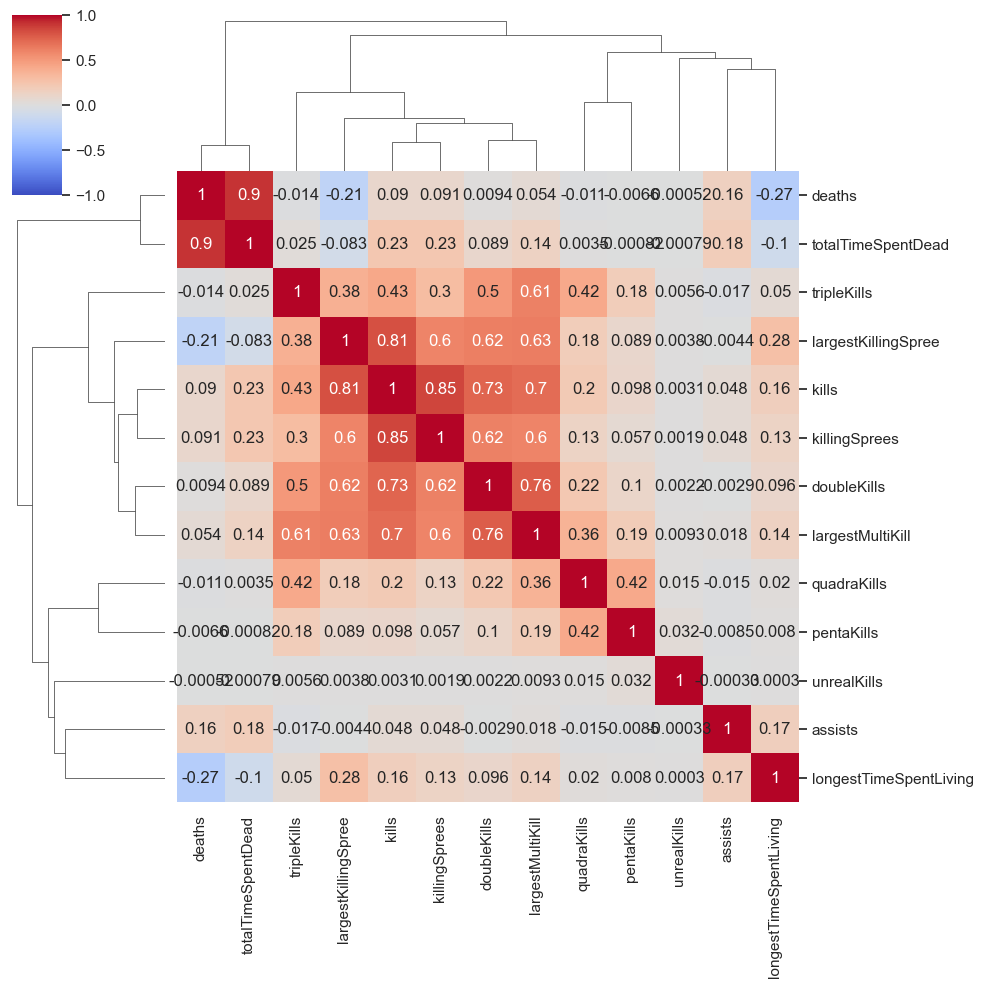

In [38]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 8))
sns.clustermap(part_kda_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [39]:
participant_df.head(10)


,matchId,teamId,turn,gameEndedInEarlySurrender,gameEndedInSurrender,lane,role,championId,champExperience,champLevel,...,neutralMinionsKilled,totalMinionsKilled,visionScore,visionWardsBoughtInGame,detectorWardsPlaced,wardsKilled,wardsPlaced,objectivePlaystyle,healPlaystyle,Position
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,False,False,JUNGLE,NONE,23,13182,15,...,4,203,10,0,0,0,7,0,4,TOP
1,0,0,2,False,False,JUNGLE,NONE,203,12374,14,...,145,30,13,0,0,4,1,0,3,JUNGLE
2,0,0,3,False,False,MIDDLE,SOLO,90,13929,15,...,4,221,16,0,0,1,8,0,1,MIDDLE
3,0,0,4,False,False,BOTTOM,CARRY,145,9258,12,...,8,151,15,0,0,3,7,2,1,BOTTOM
4,0,0,5,False,False,BOTTOM,SUPPORT,12,8200,11,...,0,33,45,9,6,3,22,2,4,UTILITY
5,0,1,6,False,False,TOP,SOLO,122,9541,12,...,1,124,23,1,1,3,8,2,1,TOP
6,0,1,7,False,False,JUNGLE,NONE,104,13937,15,...,151,41,28,3,3,2,5,1,4,JUNGLE
7,0,1,8,False,False,MIDDLE,SOLO,34,12944,14,...,0,178,16,0,0,2,8,0,1,MIDDLE
8,0,1,9,False,False,JUNGLE,NONE,29,12398,14,...,16,209,15,1,1,1,8,3,4,BOTTOM


In [40]:
participant_df.to_csv('clean_data/participant.csv', index=True)

### Daño en partida

In [ ]:
['physicalDamageDealt',
'physicalDamageDealtToChampions',
'physicalDamageTaken',
'magicDamageDealt',
'magicDamageDealtToChampions',
'magicDamageTaken',
'trueDamageDealt',
'trueDamageDealtToChampions',
'trueDamageTaken',
'totalDamageDealt',
'totalDamageDealtToChampions',
'totalDamageTaken',
'damageDealtToBuildings',
'damageDealtToObjectives',
'damageDealtToTurrets',
'largestCriticalStrike',
'damageSelfMitigated',
'totalDamageShieldedOnTeammates']

In [ ]:
summoner1Id,
summoner1Casts,
summoner2Id,
summoner2Casts,

In [ ]:
timeCCingOthers,
totalTimeCCDealt,

In [ ]:
neutralMinionsKilled,
totalAllyJungleMinionsKilled,
totalEnemyJungleMinionsKilled,
totalMinionsKilled,

In [ ]:
objectivesStolen,
objectivesStolenAssists,
baronKills,
dragonKills,
firstBloodKill,
firstBloodAssist,
firstTowerKill,
firstTowerAssist,
nexusKills,
nexusTakedowns,
turretKills,
turretTakedowns,
inhibitorKills,
inhibitorTakedowns,

In [ ]:
visionScore,
sightWardsBoughtInGame,
visionWardsBoughtInGame,
detectorWardsPlaced,
wardsKilled,
wardsPlaced,